# Question 1

In [8]:
import pandas as pd
# 1 reading the file and importing necessary library
users = pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user" , sep = '|' , engine = 'python')#https://thispointer.com/pandas-read-csv-file-to-dataframe-with-custom-delimiter-in-python/#:~:text=....)-,pandas.,separator%20while%20parsing%20a%20file.
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [23]:
# 4 Finding the mean age per occupation
means = users.groupby("occupation").age.mean().reset_index(name="Mean Age")
means

,occupation,Mean Age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


In [31]:
# 5 Discovering the Male ratio per occupation and sorting it from most to least
males = (users.groupby("occupation")["gender"].value_counts(normalize=True)*100).reset_index(name="Ratios")
males

,occupation,gender,Ratios
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


In [32]:
# 5 Discovering the Male ratio per occupation and sorting it from most to least
males[males["gender"] == "M"].sort_values(by="Ratios",ascending=False)

,occupation,gender,Ratios
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [47]:
# 6 calculating the minimum and maximum ages For each occupation,
minmax = users.groupby("occupation").age.agg([min,max])
minmax.rename(columns = {'min':'Minimum Age'}, inplace = True)
minmax.rename(columns = {'max':'Maximum Age'}, inplace = True)
minmax

,Minimum Age,Maximum Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [51]:
# 7 For each combination of occupation and sex, calculating the mean age
users.groupby(["occupation", "gender"]).age.mean().reset_index(name="Mean Ages")

,occupation,gender,Mean Ages
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


In [53]:
# 8 For each occupation presenting the percentage of women and men
proportion = (users.groupby("occupation")["gender"].value_counts(normalize=True)*100).reset_index(name="percent")
proportion

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


# Question 2

In [55]:
# 1 importing necessary libraries and reading the dataset
import pandas as pd
euro12 = pd.read_csv(r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv" , sep = ',' , engine = 'python')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [128]:
# 4 Selecting the goal column
print('The Goal Column :')
euro12[['Goals']]

The Goal Column :


,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [191]:
# 5 calculating the number of teams that participated in Euro 2012
print('The number of teams that participated in Euro 2012 are:')
euro12.Team.nunique()#https://www.statology.org/pandas-count-unique-values/#:~:text=You%20can%20use%20the%20nunique,values%20in%20a%20pandas%20DataFrame.

The number of teams that participated in Euro 2012 are:


16

In [130]:
# 6 finding out the number of columns in the dataset
print('The number of columns in the dataset is :')
euro12.shape[1]

The number of columns in the dataset is :


35

In [76]:
# 7 selecting the columns Team,Yellow cards and red cards and assigning them to a new datafram called discipline
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [206]:
#sorting the team by red cards and then by yellow cards
print("Sorted by Red Cards And Then by Yellow Cards:")
discipline.sort_values(["Red Cards"])
discipline.sort_values(["Yellow Cards"])


Sorted by Red Cards And Then by Yellow Cards:


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
11,Republic of Ireland,6,1
12,Russia,6,0
1,Czech Republic,7,0
9,Poland,7,1


In [107]:
# 9 calculating the mean yellow cards given to each team
print('The mean of Yellow Cards given per team :')
discipline['Yellow Cards'].mean()

The mean of Yellow Cards given per team :


7.4375

In [114]:
# 10 finding out the teams which scored more than 6 goals
print('The teams which scored more than 6 goals are : ')
goal6 = euro12[euro12["Goals"] > 6]
goal6

The teams which scored more than 6 goals are : 


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [116]:
# 11 finding out the teams whose names start with G
Startwith = euro12[euro12["Team"].str.startswith("G")]#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html
Startwith

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [125]:
# 12 showing the first 7 columns of the dataset
print('The first 7 Columns are :')
euro12.iloc[:, :8]

The first 7 Columns are :


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork
0,Croatia,4,13,12,51.9%,16.0%,32,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0
2,Denmark,4,10,10,50.0%,20.0%,27,1
3,England,5,11,18,50.0%,17.2%,40,0
4,France,3,22,24,37.9%,6.5%,65,1
5,Germany,10,32,32,47.8%,15.6%,80,2
6,Greece,5,8,18,30.7%,19.2%,32,1
7,Italy,6,34,45,43.0%,7.5%,110,2
8,Netherlands,2,12,36,25.0%,4.1%,60,2
9,Poland,2,15,23,39.4%,5.2%,48,0


In [124]:
# 13 showing all the columns exept the last 3 of the dataset
print('All the Columns exept the last 3 :')
euro12.iloc[:, :-3]

All the Columns exept the last 3 :


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [127]:
# 14 showing the shooting accuracy of England, Italy and Russia
shoot = euro12.loc[euro12.Team.isin(["England", "Italy", "Russia"]), ["Team","Shooting Accuracy"]]#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
shoot

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [258]:
# 1 importing necessary libraries and creating the random number series
import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))#https://www.codegrepper.com/code-examples/python/how+to+create+a+random+series+in+pandas
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))
print(series1 , series2 , series3)


0     4
1     4
2     3
3     4
4     3
     ..
95    3
96    1
97    4
98    3
99    2
Length: 100, dtype: int32 0     3
1     2
2     3
3     1
4     2
     ..
95    1
96    2
97    2
98    1
99    3
Length: 100, dtype: int32 0     20396
1     29804
2     24411
3     27596
4     15242
      ...  
95    26831
96    26904
97    28866
98    27913
99    18340
Length: 100, dtype: int32


In [259]:
# 3 Creating a DataFrame by joinning the Series by column

realty = pd.concat([series1, series2, series3], axis=1)#https://datacarpentry.org/python-socialsci/11-joins/index.html
realty.head()

,0,1,2
0,4,3,20396
1,4,2,29804
2,3,3,24411
3,4,1,27596
4,3,2,15242


In [260]:
# 4 Changing the name of the columns to bedrs, bathrs, price_sqr_meter
realty.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
realty.head()

,bedrs,bathrs,price_sqr_meter
0,4,3,20396
1,4,2,29804
2,3,3,24411
3,4,1,27596
4,3,2,15242


In [261]:
# 5  Creating a one column DataFrame with the values of the 3 Series and assigning it to bigcolumn
bigcolumn = pd.concat([series1, series2, series3], axis=0)#https://datacarpentry.org/python-socialsci/11-joins/index.html
bigcolumn = bigcolumn.to_frame()#https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html
bigcolumn

,0
0,4
1,4
2,3
3,4
4,3
...,...
95,26831
96,26904
97,28866
98,27913


In [262]:
# 6 Ops it seems it is going only until index 99. Is it true?
# The dataframe indexes will go till 99 becuase pandas indexes from 0 onwards but the length of the dataframe is still 300
bigcolumn#In the bottom it says that the rows are still 300 even though the index is till 99

,0
0,4
1,4
2,3
3,4
4,3
...,...
95,26831
96,26904
97,28866
98,27913


In [264]:
# 7 Reindexing the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True , inplace=True)#https://cmdlinetips.com/2018/04/how-to-reset-index-in-pandas-dataframe/
bigcolumn

,0
0,4
1,4
2,3
3,4
4,3
...,...
295,26831
296,26904
297,28866
298,27913


# Question 4

In [44]:
# 1,2,3 Importing the necessary libraries , Importing the dataset , assigning the dataset to variable data and replacing first 3 columns with datetime index
import pandas as pd
import datetime as dt

data = pd.read_csv(r"C:\course contents\Data Programming\problem set 3\winds.txt" , sep = "\s+" , parse_dates = {'Time':[0,1,2]})#https://pandas.pydata.org/pandas-docs/version/0.20.1/generated/pandas.read_csv.html
data

,Time,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [45]:
# 4 Fixing the years in the dataset as the data has been accidentally been formatted as 2061 fixing it to actual data which is 1961 
def datefix(x):
    if x.year > 1988:
        year = x.year - 100
        return dt.date(year, x.month, x.day)
    elif x.year <= 1988 :
        year = x.year

    
  
data['Time'] = data['Time'].apply(datefix)

data.head()

,Time,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [46]:
# 5 changing datatype to datetime64
data["Time"] = pd.to_datetime(data["Time"])#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    4017 non-null   datetime64[ns]
 1   RPT     6568 non-null   float64       
 2   VAL     6571 non-null   float64       
 3   ROS     6572 non-null   float64       
 4   KIL     6569 non-null   float64       
 5   SHA     6572 non-null   float64       
 6   BIR     6574 non-null   float64       
 7   DUB     6571 non-null   float64       
 8   CLA     6572 non-null   float64       
 9   MUL     6571 non-null   float64       
 10  CLO     6573 non-null   float64       
 11  BEL     6574 non-null   float64       
 12  MAL     6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [47]:
# 5 setting Time column as index of dataset
data = data.set_index('Time')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Time,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [48]:
# 6 calculating the number of missing values in the dataset
data.isnull().sum()#https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [49]:
# 7 Calculating the number of non missing values in the dataset
data.notnull().sum()#https://pandas.pydata.org/docs/reference/api/pandas.notnull.html

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [57]:
#8 Calculating the mean windspeeds of the windspeeds over all the locations and
all the times.
data.sum().mean() / data.notna().sum().mean()

10.227883764282181

In [63]:
# 9 Creating a DataFrame called loc_stats and calculating the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min(axis = 0) 
loc_stats['max'] = data.max(axis = 0)
loc_stats['mean'] = data.mean(axis = 0) 
loc_stats['standard Deviation'] = data.std(axis = 0)
loc_stats

,min,max,mean,standard Deviation
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [65]:
# 10 Creating a DataFrame called day_stats and calculating the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day

day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) 
day_stats['max'] = data.max(axis = 1)
day_stats['mean'] = data.mean(axis = 1) 
day_stats['standard Deviation'] = data.std(axis = 1)
day_stats.head()

,min,max,mean,standard Deviation
Time,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [66]:
# 11 Finding out the average windspeed in January for each location.
data.loc[data.index.month == 1].mean()

RPT    14.387412
VAL    12.588500
ROS    13.154223
KIL     7.222082
SHA    11.492743
BIR     7.819472
DUB    11.454076
CLA     9.306853
MUL     8.636569
CLO     9.850147
BEL    14.081378
MAL    16.682375
dtype: float64

In [67]:
# 12 Downsampling the record to a yearly frequency for each location.
data.groupby(data.index.to_period('Y')).mean()#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_period.html

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Time,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [68]:
# 13 Downsampling the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_period.html

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Time,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1971-08,9.783226,6.991935,10.227097,4.540968,8.978065,4.797742,7.450645,5.460645,6.866452,5.244194,10.087742,11.500968
1971-09,8.365000,6.512667,7.704333,3.470667,7.676667,5.462667,6.003000,4.437333,5.385667,4.748667,9.232333,12.311333
1971-10,12.926129,11.106452,12.467419,5.778065,11.305161,8.562903,10.073226,8.091935,9.121935,9.571290,15.617097,17.890645


In [69]:
# 14 Downsampling the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()# Does not how to do weekly expicitly so tried with W keyword https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_period.html


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Time,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1971-11-29/1971-12-05,10.344286,9.844286,8.838571,2.714286,8.114286,5.035714,7.517143,4.985714,6.040000,5.780000,14.201429,15.980000
1971-12-06/1971-12-12,7.971429,5.078571,6.978571,3.041429,6.185714,4.815714,9.797143,5.024286,7.060000,7.970000,13.684286,19.665714
1971-12-13/1971-12-19,20.255714,17.457143,16.861429,10.178571,15.407143,12.388571,14.271429,12.982857,13.342857,15.375714,24.690000,25.822857


In [72]:
# 15 Calculating the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week 
week = data.groupby(data.index.to_period('W')).agg(['min','max','mean','std'])
week.loc[week.index[1:53], "RPT":"MAL"] 
week.head()


RPT                                VAL         \
                         min    max       mean       std    min    max   
Time                                                                     
1960-12-26/1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96   
1961-01-02/1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88   
1961-01-09/1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   
1961-01-16/1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   
1961-01-23/1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91   

                                              ROS         ...        CLO  \
                            mean       std    min    max  ...       mean   
Time                                                      ...              
1960-12-26/1961-01-01  14.960000       NaN  13.17  13.17  ...  12.580000   
1961-01-02/1961-01-08  11.486667  3.949525   7.62  12.33  ...   8.497143   
1961-01-09/1961-01-15   8.967143  3.148945   7.08  19.50  ...   7.571429   
1961-01-16/1961-01-22   9.862857  3.837785   7.29  20.79  ...   8.124286   
1961-01-23/1961-01-29  16.141429  5.170224  12.67  25.84  ...  15.640000   

                                   BEL                                MAL  \
                            std    min    max       mean       std    min   
Time                                                                        
1960-12-26/1961-01-01       NaN  18.50  18.50  18.500000       NaN  15.04   
1961-01-02/1961-01-08  1.704941   5.46  17.54  12.481429  4.349139  10.88   
1961-01-09/1961-01-15  4.084293   5.25  20.71  11.125714  5.552215   5.17   
1961-01-16/1961-01-22  4.783952   6.50  15.92   9.821429  3.626584   6.79   
1961-01-23/1961-01-29  3.713368  14.04  27.71  20.930000  5.210726  17.50   

                                                   
                         max       mean       std  
Time                                               
1960-12-26/1961-01-01  15.04  15.040000       NaN  
1961-01-02/1961-01-08  16.46  13.238571  1.773062  
1961-01-09/1961-01-15  16.92  11.024286  4.692355  
1961-01-16/1961-01-22  17.96  11.434286  4.237239  
1961-01-23/1961-01-29  27.63  22.530000  3.874721  

[5 rows x 48 columns]

# Question 5

In [457]:
#importing neccessary libraries and reading the data
import pandas as pd
chipo = pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv" , sep = "\t")#https://www.adamsmith.haus/python/answers/how-load-a-.tsv-file-into-pandas-dataframe

In [458]:
# 4 printing the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [459]:
# 5 finding out the number of observations
print('The number of observations in the dataset are :')
chipo.shape[0]

The number of observations in the dataset are :


4622

In [460]:
# 6 finding out the number of coulumns in the dataset
print("The number of Columns in the dataset are :")
chipo.shape[1]

The number of Columns in the dataset are :


5

In [461]:
# 7 printing the name of the columns of the dataset
print("The Column names are :")
chipo.columns

The Column names are :


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [462]:
# 8 finding out how the dataset is indexed
print("The Dataset is indexed : ")
chipo.index

The Dataset is indexed : 


RangeIndex(start=0, stop=4622, step=1)

In [463]:
# 9 finding out the most ordered item
print('The most Popular item  is : ')
chipo.groupby('item_name').count()['quantity'].idxmax()#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

The most Popular item  is : 


'Chicken Bowl'

In [464]:
# 10 finding out the quantity of the most ordered item in the dataset
qu = chipo.item_name.value_counts()
qu.head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [465]:
# 11 finding out the most ordered item in the choice description column
print('The most ordered item in the choice decription column is :')
most = chipo.groupby('choice_description').count()['quantity'].idxmax()
most
    

The most ordered item in the choice decription column is :


'[Diet Coke]'

In [466]:
# 12 finding out total ordered items
print('The total items ordered are :')
chipo.quantity.sum()

The total items ordered are :


4972

In [442]:
# 13 changing data type using in built function astype 
chipo = chipo.astype({'item_price':'float'})#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
totalOrderAmount      float64
dtype: object

In [467]:
# 13 changing the data type using lambda function 
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1])  )
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [469]:
# 14 Finding out the total revenue of the dataset
print('The total Revenue for the Dataset is :')
revenue = chipo['item_price'] * chipo['quantity']
revenue.sum()

The total Revenue for the Dataset is :


39237.02

In [472]:
# 15 finding out how many orders were made in total
quant = chipo['order_id'].nunique()
quant

1834

In [480]:
# 16 finding out average revenue amount per order
chipo['totalOrderAmount'] = chipo['item_price'] * chipo['quantity']
chipo.groupby('order_id')['totalOrderAmount'].sum().mean()

21.394231188658654

In [478]:
# 17 printing how many diffrent items are sold
print("The number of items sold are :")
chipo['item_price'].nunique()

The number of items sold are :


78

# question 6

Text(0, 0.5, 'Number Per Capita')

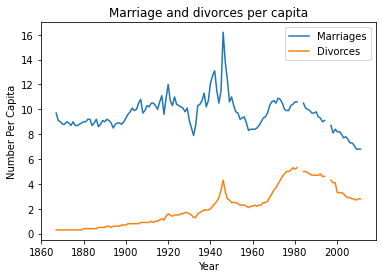

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

marriagedata = pd.read_csv(r"C:\course contents\Data Programming\problem set 3\us-marriages-divorces-1867-2014.csv")
marriagedata
fig , ax = plt.subplots()
plt.plot(marriagedata['Year'] , marriagedata['Marriages_per_1000'] , label = "Marriages")
plt.plot(marriagedata['Year'] , marriagedata['Divorces_per_1000'] , label = "Divorces")
plt.legend()
plt.title("Marriage and divorces per capita")
plt.xlabel('Year')
plt.ylabel('Number Per Capita')







# Question 7 

Text(0, 0.5, 'Marriages and Divorces')

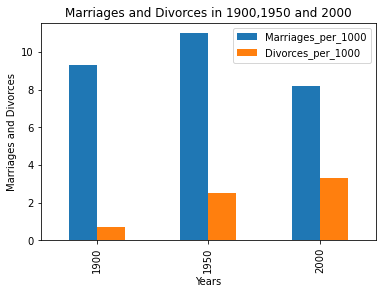

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

maryear = pd.read_csv(r"C:\course contents\Data Programming\problem set 3\us-marriages-divorces-1867-2014.csv")
df1900 = maryear[maryear.Year == 1900].iloc[:100,:]
df1950 = maryear[maryear.Year == 1950].iloc[:100,:]
df2000 = maryear[maryear.Year == 2000].iloc[:100,:]
frames = pd.concat([df1900, df1950 , df2000])#https://datacarpentry.org/python-socialsci/11-joins/index.html
frames.plot(x="Year", y=['Marriages_per_1000', 'Divorces_per_1000'], kind="bar")
plt.title("Marriages and Divorces in 1900,1950 and 2000")
plt.xlabel('Years')
plt.ylabel('Marriages and Divorces')




            


# Question 8

<BarContainer object of 10 artists>

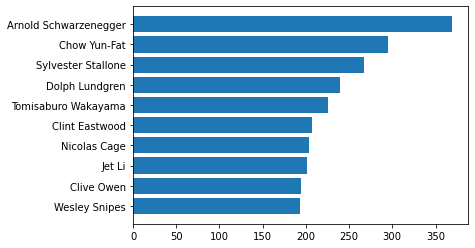

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

actorskill = pd.read_csv(r"C:\course contents\Data Programming\problem set 3\actor_kill_counts.csv")
actorskill.sort_values('Count' , inplace = True)
plt.barh(actorskill['Actor'] , actorskill['Count'])

# Question 9

<AxesSubplot:ylabel='Length_of_Reign'>

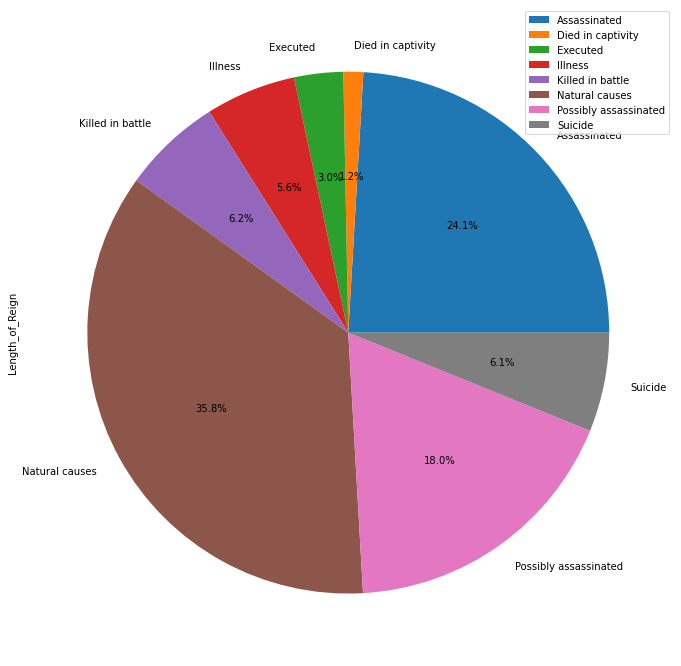

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

emperors = pd.read_csv(r"C:\course contents\Data Programming\problem set 3\roman-emperor-reigns.csv")
emperors.groupby(['Cause_of_Death']).sum().plot(kind = 'pie' , y = 'Length_of_Reign' , figsize = [18 , 12] , autopct = '%1.1f%%')

# Question 10

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

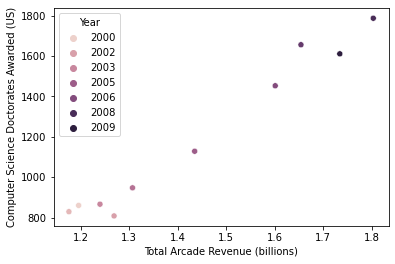

In [65]:
import seaborn as sns
revenue = pd.read_csv(r"C:\course contents\Data Programming\problem set 3\arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot( x = 'Total Arcade Revenue (billions)' , y = 'Computer Science Doctorates Awarded (US)' , hue = 'Year' , data = revenue)